## Exploratory Data Analysis on Diabetes
### by Moshood Sidiq

## Introduction
 Diabetes is one of the most prevalent chronic diseases in America. This project aims to deeply explore a dataset on Diabetes collected by America Centre for Disease COntrol (CDC), and find out key insights that can help to possibly reduce the prevalence of the disease in question. The dataset consists 22 variables which provides health information on about 70,692  diabetic and non-diabetic survey responses. 
 





## Preliminary Wrangling/Cleaning

This section is about getting familiarized with the dataset (especially the variables), inspecting it and assessing how clean it is.

In [23]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading in dataset...

In [24]:
diabetes_df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


**Variables**

It will be important to briefly explain the variables, to help understanding and flow along better with the process. 

1. *Diabetes_012* : The stage of entry; 0 = No diabetes, 1 = Prediabetes/Diabetes.
 
2. *HighBP* : High blood pressure; 0 = No, 1 = Yes

3. *HighChol* : Chlesterol level; 0 = Low, 1 = High.

4. *CholCheck* : Whether cholesterol level is checked in the last 5 years; 0 = No, 1 = Yes.

5. *Body Mass Index (BMI)*

6. *Smoker* : Whether entry has smoked up to 100 cigarette (or 5 packs) in his/her lifetime; 0 = No, 1 = Yes.

7. *Stroke* : Whether entry has/had stroke; 0 = No, 1 = Yes.

8. *HeartDiseaseorAttack* : Whether entry has a heart problem (CHD or MI); 0 = No, 1 = Yes.

9. *PhysActivity* : Whether entry is engaged in any physical activity (or excercise) in the last 30 days, apart from job; 0 = No, 1 = Yes 

10. *Fruits* : Whether entry takes fruits one or more times daily; 0 = No, 1 = Yes.

11. *Veggies* : Whether entry consumes vegetables one or more times daily; 0 = No, 1 = Yes.

12. *HvyAcloholConsump* : Alcohol consumption, heavy or moderate (adult men having more than 14 bottles weekly, and adult women having more than 7 bottles weekly); 0 = Moderate/No consumption,  1 = Heavy.

13. *AnyHealthCare* : Under any healthcare schemes (health insurance or prepaid plans); 0 = No, 1 = Yes.

14. *NoDocbcCost* : Whether if there was a time if entry couldn't see a doctor  because of cost; 0 = No, 1 = Yes

15. *GenHlth* : Health state of entry in general terms. [On a scale of 1-5]; 1 : excellent, 2 : very good, 3 : good, 4 : fair, 5 : poor.

16. *MentHlth* : This gives us information about the mental health state, including stress, depression, and problems with emotions. The variable tells  us many days did an entry experienced any of the issues in the last 30days.

17. *PhysHlth* : This tells how many days has the entry experienced any physical health issues (injury, accident, or illnes) in the last 30 days.

18. *DiffWalk* : Tells us whether entry experiences difficulty in walking, or climbing stairs; 0 = No, 1 = Yes.

19. *Sex* : Male or Female.

20. *Age* : Age group. On a scale of 1-13; 
>1 = Age 18 to 24, 2 = Age 18 to 24, 3 = Age 25 to 29, 4 = Age 30 to 34, 5 = Age 35 to 39, 6 = Age 40 to 44, 7 = Age 45 to 49, 8 = Age 50 to 54, 9 = Age 55 to 59, 10 = Age 60 to 64, 11 = Age 65 to 69, 12 = Age 70 to 74, 13 = Age 80 or older

21. *Education* : Education level. On a scale of 1-6; 
>1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate)

22. *Income* :  On a scale of 1-8; 1 =  Less than 10,000, 2 = Less than 15,000, 3 = Less than 20,000, 4 = Less than 25,000, 5 = Less than 35,000, 6 = Less than 50,000, 7 = Less than 75,000, 8 = 75,000 or more. (All in dollars)


In [25]:
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [26]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
Diabetes_binary         70692 non-null float64
HighBP                  70692 non-null float64
HighChol                70692 non-null float64
CholCheck               70692 non-null float64
BMI                     70692 non-null float64
Smoker                  70692 non-null float64
Stroke                  70692 non-null float64
HeartDiseaseorAttack    70692 non-null float64
PhysActivity            70692 non-null float64
Fruits                  70692 non-null float64
Veggies                 70692 non-null float64
HvyAlcoholConsump       70692 non-null float64
AnyHealthcare           70692 non-null float64
NoDocbcCost             70692 non-null float64
GenHlth                 70692 non-null float64
MentHlth                70692 non-null float64
PhysHlth                70692 non-null float64
DiffWalk                70692 non-null float64
Sex                     70692 non-null float6

In [27]:
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [28]:
diabetes_df.shape

(70692, 22)

In [29]:
diabetes_df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [30]:
diabetes_df.duplicated().sum()

1635

From the findings above, there are no missing values, but there are about 1,635 duplicated entries. Since the significance is quite low, it is much safe to drop the duplicated entries.

In [31]:
#creating a new clean dataframe, dropping duplicate entries...
diabetes_clean = diabetes_df.copy()
diabetes_clean.drop_duplicates(inplace=True)

In [32]:
#checking for the the number of entries that aren't duplicate
diabetes_clean.shape[0]

69057

It will be quite better to perform a bit of wrangling on the ordinal features by changing them from the numerical representations to what they actually are. This will better enhance the understanding of the analysis process.

In [33]:
#creating a function to create non-repitive code
def subst(df, col, dict1):
        df.replace(dict(zip(col, dict1)), inplace=True)
        

#def replace_all(df, cols, dicts):
    
#substituting for all ordinal columns...
dict1 = {0:'Non-Diabetic', 1:'(Pre)Diabetic'}
dict2 = {0:'Normal', 1:'High'}
dict3 = { 0:'Low', 1 :'High'}
dict4 = { 0:'No', 1 :'Yes'}
dict5 = { 0:'No', 1 :'Yes'}
dict6 = { 0:'No', 1 :'Yes'}
dict7 = { 0:'No', 1 :'Yes'}
dict8 = { 0:'No', 1 :'Yes'}
dict9 = { 0:'No', 1 :'Yes'}
dict10 = {0:'No', 1:'Yes'}
dict11 = {0:'Moderate/No', 1:'Heavy'}
dict12 = { 0:'No', 1 :'Yes'}
dict13 = { 0:'No', 1 :'Yes'}
dict14 = {1:'Excellent', 2:'Very good', 3:'Good', 4:'Fair', 5:'Poor'}
dict15 = { 0:'No', 1 :'Yes'}
dict16 = { 0:'Female', 1 :'Male'}
dict17 = {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 
          11:'70-74', 12:'75-79', 13:'80 or older'}
dict18 = {1:'KDG/None', 2:'Elementary', 3:'Mid High', 4:'Grad High', 5:'Mid Col/Tech', 6:'Col Grad'}
dict19 = {1:'Less than 10', 2:'10-14', 3:'15-19', 4:'20-24', 5:'25-34', 6:'35-49', 7:'50-74', 8:'75 or more'}

cols = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
        'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
dicts = [dict1, dict2, dict3, dict4, dict5, dict6, dict7, dict8, dict9, dict10, dict11, dict12, dict13, dict14, dict15, dict16,
         dict17, dict18, dict19]
subst(diabetes_clean, cols, dicts)

In [34]:
diabetes_clean.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
59996,(Pre)Diabetic,High,High,Yes,30.0,No,No,No,Yes,Yes,...,Yes,No,Good,2.0,0.0,Yes,Female,65-69,Grad High,20-24
8513,Non-Diabetic,Normal,High,Yes,20.0,Yes,Yes,Yes,Yes,No,...,Yes,No,Fair,12.0,30.0,Yes,Male,60-64,Grad High,15-19
26603,Non-Diabetic,Normal,Low,Yes,23.0,No,No,No,Yes,Yes,...,Yes,No,Excellent,0.0,0.0,No,Male,30-34,Mid Col/Tech,50-74
41444,(Pre)Diabetic,High,High,Yes,37.0,No,No,No,No,No,...,Yes,No,Fair,2.0,4.0,Yes,Female,65-69,Mid Col/Tech,15-19
7397,Non-Diabetic,High,High,Yes,26.0,No,No,No,No,Yes,...,Yes,No,Excellent,0.0,0.0,No,Female,65-69,Col Grad,75 or more


In [35]:
#saving cleaned data to csv file 
diabetes_clean.to_csv('Diabetes_dataset.csv', index=False)

### What is the structure of your dataset?

The dataset contains 70,692 entries with duplicates, and 69057  entries without duplicates. There are 22 variables with most of them being categorical(ordinal) with the exception of BMI, MentHlth and PhysHlth which are continous.

### What is/are the main feature(s) of interest in your dataset?
I am most interested in the features that affects diabetic state of people one way or the other, which in turn may possible profer measures/ lifestyles that are needed to be adopted to reduce the prevalence of diabetes.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Basically, I think every feature has one or more ways of supporting my investigations by proffering some answers. However, the primary feature remains 'Diabetes_binary',  and I will try to find out how other variables affect it.


## Univariate Exploration
We start with univariate explorations to find out the distribution of each feature/variable.

It will very good to visualize the binary variables with pie charts...

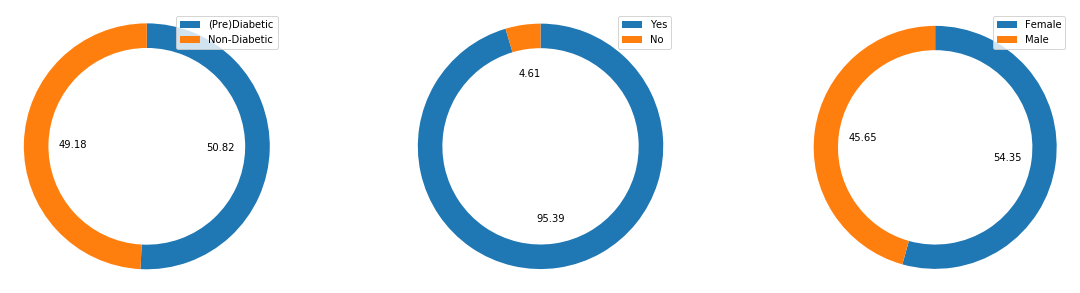

In [36]:
#setting a function that can help to authomatically create a piechart
def set_pie(df, col):
    sorted_counts = df[col].value_counts()
    
    plt.pie(sorted_counts, labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, radius=2, autopct='%.02f');
    plt.axis('square')
    plt.legend(sorted_counts.index)
  

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)
set_pie(diabetes_clean, 'Diabetes_binary')

plt.subplot(1, 3, 2)
set_pie(diabetes_clean, 'AnyHealthcare')

plt.subplot(1, 3, 3)
set_pie(diabetes_clean, 'Sex')

The charts show that the diabetic status is fairly balanced, most people are on healthcare schemesand lastly, female entries are higher than male entries. 

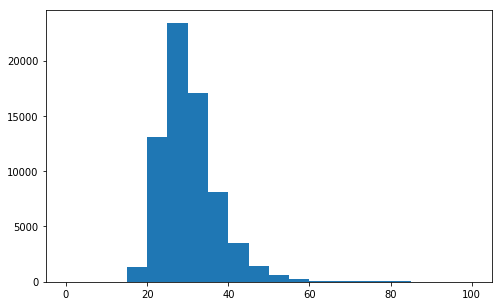

In [37]:
#checking the BMI distribution...

bins = np.arange(0, diabetes_clean['BMI'].max()+5, 5)

plt.figure(figsize=[8, 5])
plt.hist(data=diabetes_clean, x='BMI', bins=bins);

The BMI distribution is unimodal, skewed to the right, with a mode of approximately 30.

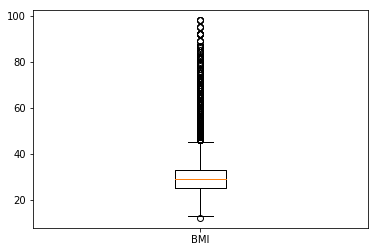

In [38]:
#checking for outliers in BMI
plt.boxplot(data=diabetes_clean, x='BMI');
plt.xticks([1],['BMI']);

Looks like there are much outliers, but will be quite interesting working with them.

In [39]:
diabetes_clean['GenHlth'].value_counts()

Good         23246
Very good    19105
Fair         13292
Excellent     7607
Poor          5807
Name: GenHlth, dtype: int64

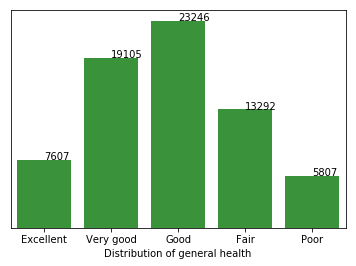

In [40]:
#checking for the distribution of GenHlth
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
base_color = sb.color_palette()[2]
counts = [7607, 19105, 23246, 13292, 5807]
order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
sb.countplot(data=diabetes_clean, x='GenHlth',order = order,color=base_color)
addlabels(order, counts)
plt.yticks([],[])
plt.ylabel('');
plt.xlabel('Distribution of general health');

In [41]:
#checking for the proportion of each income and age classes
def prop_max(df, col):
    count_col = df[col].value_counts()

    col_total = count_col.sum() #total counts of the column
    max_col_count = count_col[0]
    prop_max_col = max_col_count/col_total
    return prop_max_col


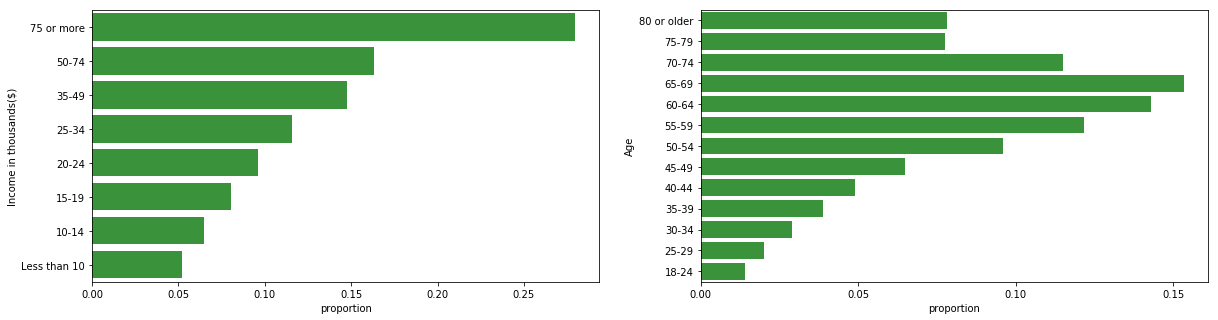

In [42]:
income_total = diabetes_clean['Income'].value_counts().sum()
income_order = diabetes_clean['Income'].value_counts().index
prop_max_income = prop_max(diabetes_clean, 'Income')
tick_props_income = np.arange(0, prop_max_income, 0.05)
tick_names_income = ['{:0.2f}'.format(v) for v in tick_props_income]

age_total = diabetes_clean['Age'].value_counts().sum()
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
prop_max_age = prop_max(diabetes_clean, 'Age')
tick_props_age = np.arange(0, prop_max_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]


plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sb.countplot(data=diabetes_clean, y='Income', color=base_color, order=income_order);
plt.xticks(tick_props_income * income_total, tick_names_income)
plt.ylabel('Income in thousands($)')
plt.xlabel('proportion');

plt.subplot(1, 2, 2)
sb.countplot(data=diabetes_clean, y='Age', color=base_color, order=age_order[::-1]);
plt.xticks(tick_props_age * age_total, tick_names_age)
plt.xlabel('proportion');

The gap between the highest class and others is quite much. The age proportion seems to have older classes

In [21]:
age_total

69057

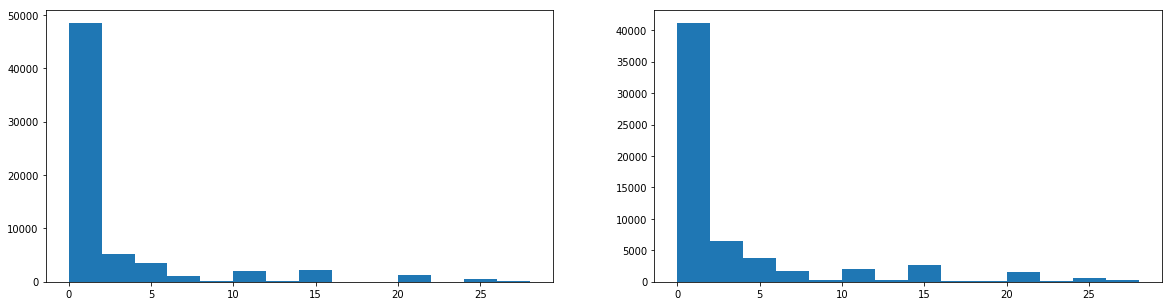

In [22]:
#checking for tje distribution of both MentHlth and PhysHlth
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
bins = np.arange(0, 30, 2)
plt.hist(data=diabetes_clean, x='MentHlth', bins=bins)

plt.subplot(1,2,2)
bins = np.arange(0, 30, 2)
plt.hist(data=diabetes_clean, x='PhysHlth', bins=bins);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
As mentioned earlier, the 'Diabetes_binary' is fiarly balanced (which tends to give room for more accuracy), with only few people not under any health scheme and female entries tends to be more compared to male entries. The 'BMI' has quite a lot of outliers, and I feel it will be interesting to work with those outliers. The general health state distribution looks quite fine, with 'Good' having the highest count, while 'Poor' having the lowest count. The gap between class with income 75 or more and other classes looks quite much. It is also noticed the entries are mostly from older people with the age distribution above. Lastly, the physical and mental health columns are quite imbalanced, with most entries having very experienced few/no days of physical and mental health issues.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The BMI, PhysHlth and MenHlth columns have a sort of unusual distribution. But it will be interesting to perfon some investigations with the outliers in the BMI, and in the course of the analysis, we could find out the reasons for low physical and mental health issues in the bivariate and multivariate aspects. Hence, no cleaning operations are performed due to unusual distributions.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

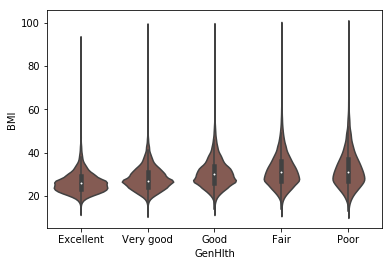

In [23]:
#relationship between BMI and GenHlth
base_color = sb.color_palette()[5]
order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
sb.violinplot(data=diabetes_clean, y='BMI', x='GenHlth', color=base_color, order=order);

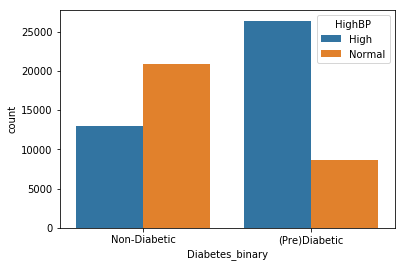

In [24]:
#the relationship between diabetes and HighBP
sb.countplot(data = diabetes_clean, x = 'Diabetes_binary', hue = 'HighBP');

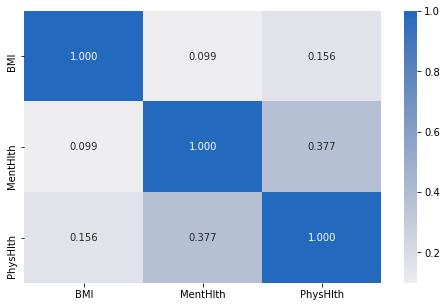

In [25]:
numeric_vars=['BMI', 'MentHlth', 'PhysHlth']
plt.figure(figsize = [8, 5])
sb.heatmap(diabetes_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The corralations aren't really pronounced from the above plot, with the exception of the correlation between Physical and Mental health difficulties.

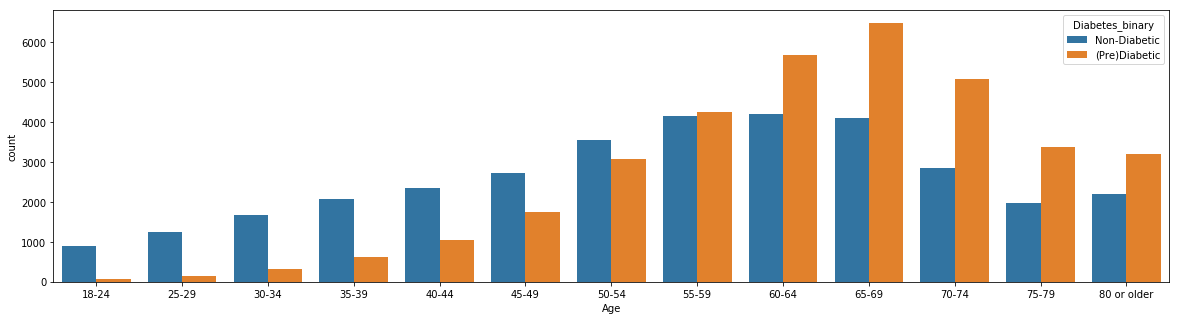

In [26]:
#reltionship between age group and diabetes
order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
plt.figure(figsize=(20,5))
sb.countplot(data=diabetes_clean, hue='Diabetes_binary', x='Age', order=order)

Diabetes risk tends to increase with age. Age 65-69 seems to have the highest risk, followed by 60-64 and 70-74

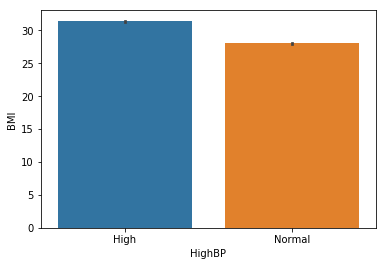

In [27]:
sb.barplot(data=diabetes_clean, x='HighBP', y='BMI')

BMI of High is more compared to BMI of low

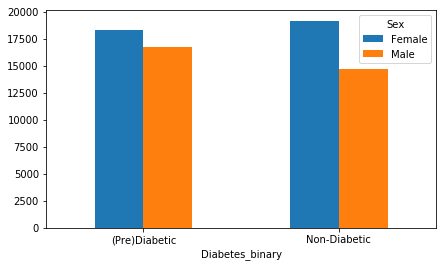

In [46]:
#checking for relationship between diabetic_binary and sex
diabetes_clean.groupby('Diabetes_binary')['Sex'].value_counts().unstack().plot.bar(rot=0, figsize=(7,4));

Females are more diabetic compared to males as shown in the chart.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Starting from the general health state in relation to the BMI, it is observeg that the BMI of the largest number of entry in each group increases with decreasing state of health, with the poor state having the highest number of outliers. Blood pressure also seem to have strong impact on the diabetic state, with the prediabetic/diabetic class having exceedingly high count of HighBP compared to the non-diabetic class. The relationship between age and Diabetic status looks striking, clustered chart depicted that the risk of being diabetic increases with increasing age. Also, finding out the relation of Blood Pressure and BMI shows having a value of BMI tends to increase a chance of having a HighBP. Sex also seems to has its own say about being Diabetic, as females tend to have higher count of being prediabetic/diabetic.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There seem to be no strong correlations between numeric variables (BMI, PhysHlth and MentHlth) while checking for their correlative coefficients.

## Multivariate Exploration

In this section, I'm going to find out how some features that gives information about how some health issues (stroke and HighBP),  lifestyle (healthwise) and demogoraphic features (income and eductaion) that affect the health state and diabetic status of each entry.

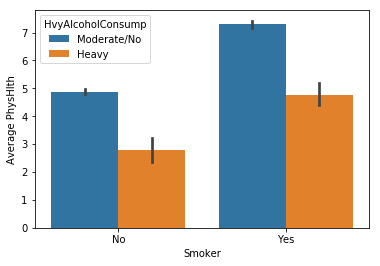

In [30]:
#how does combonation of HvyAcloholConsump and Smoker affect Diabetic status
def set_bar(df, x, y, hue):
    sb.barplot(data=df, x=x, y=y, hue=hue)
    plt.ylabel(f'Average {y}')
    
set_bar(diabetes_clean, 'Smoker', 'PhysHlth', 'HvyAlcoholConsump')

The average PhysHlth seems to be greatly high for smokers (without alcohol) followed by smokers and heavy drinkers. This strongly reveals that smoking and drinking affect the physical health

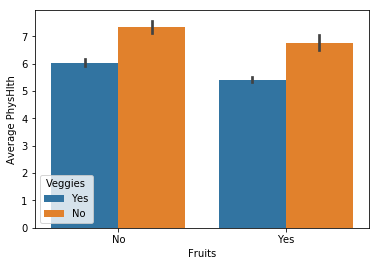

In [31]:
#how does combonation of Fruits and Veggies affect Diabetic status
set_bar(diabetes_clean, 'Fruits', 'PhysHlth', 'Veggies')

Veggies and fruits tends to reduce average physical health difficulty from the chart. 

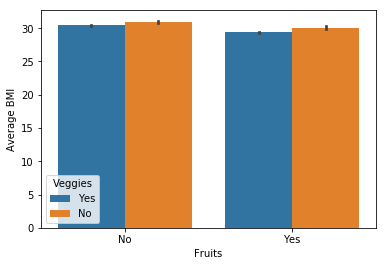

In [32]:
#how Fruits and Veggies affects BMI
set_bar(diabetes_clean, 'Fruits', 'BMI', 'Veggies')

Veggies and fruit has only slight effect on BMI from the chart

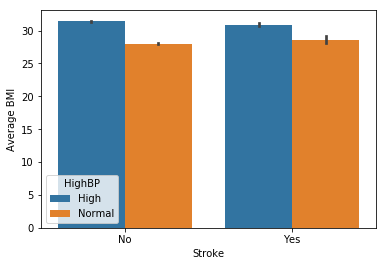

In [33]:
#how Stroke and HighBP affects BMI
set_bar(diabetes_clean, 'Stroke', 'BMI', 'HighBP')

The average BMI  for those having stroke or not remains the same for each category of HighBP. However the BMI of High is greater than BMI of normal.

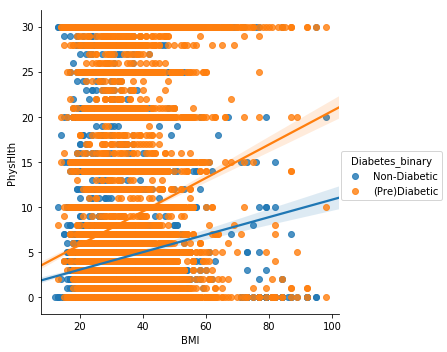

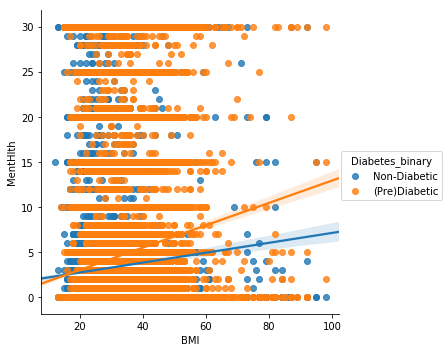

In [33]:
g = sb.FacetGrid(data = diabetes_clean, hue = 'Diabetes_binary', size = 5);
g.map(sb.regplot, 'BMI', 'PhysHlth');
g.add_legend();


g = sb.FacetGrid(data = diabetes_clean, hue = 'Diabetes_binary', size = 5);
g.map(sb.regplot, 'BMI', 'MentHlth');
g.add_legend();

There seems to be strong positive correlation between PhysHlth and BMI of (Pre)Diabetic  as compared to Non-Diabetic. Same as for mental health.

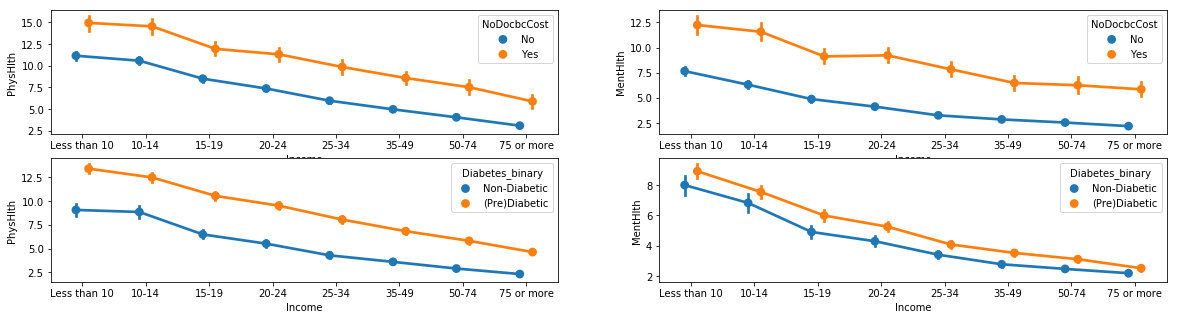

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'PhysHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)

plt.subplot(2,2,2)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'MentHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)

plt.subplot(2,2,3)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'PhysHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)

plt.subplot(2,2,4)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'MentHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)

Income is a strong determining factor that affects PhysHlth/MentHlth in relation to access to doctors/Diabetic Status. Class with higher incomes has better access to doctors and have lower health difficulties. 

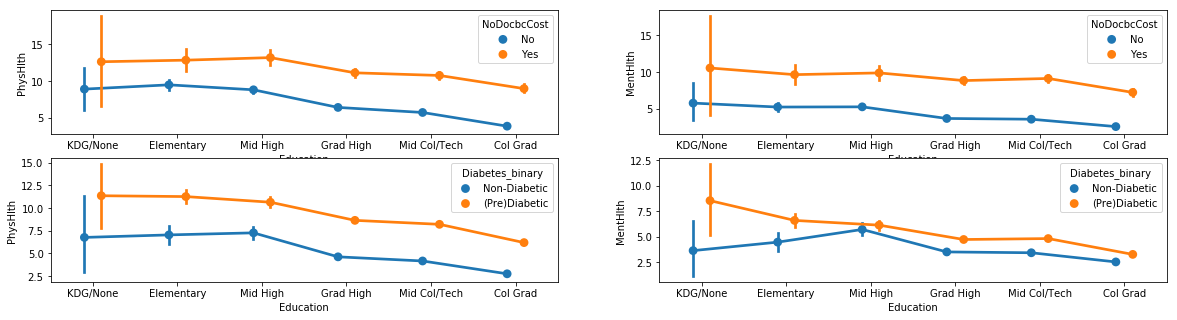

In [35]:
plt.figure(figsize=(20,5))
order = ['KDG/None', 'Elementary', 'Mid High', 'Grad High', 'Mid Col/Tech', 'Col Grad']
plt.subplot(2,2,1)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'PhysHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)

plt.subplot(2,2,2)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'MentHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)

plt.subplot(2,2,3)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'PhysHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)

plt.subplot(2,2,4)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'MentHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)

Education is also a strong determining factor that affects PhysHlth/MentHlth in relation to access to doctors/Diabetic Status. Class with higher education level has better access to doctors and have lower health difficulties.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

First, I tried to check out how some lifestyles affect numerical variables like BMI, PhysHlth and MentHlth. The combination of smoking and heavy alcohol consumption greatly affects BMI, as Smokers and heavy alcoholconsumers have high BMI value compared to non-smokers and drinkers. Taking some fruits and vegetables tends tents to improve physical health and also helps to maintain an healthy BMI. There also seem to be a strong positive correlation between increasing Mental and.  Physical health difficulties and increasing BMI of those who are (Pre)Diabetic.

### Were there any interesting or surprising interactions between features?
The relationship between demographic factors like Income and Education, with access to doctors and diabetic status, in consideration of mental and physical health difficulties looks quite interesting! It can be clearly depicted from the pointplots that Physical health, coupled with access to doctors and diabetic status is much better with increasing income and increasing level of education.